In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

# import sklearn

In [3]:
df = pd.read_csv("../data/raw/data - data.csv")
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [ ]:
# unique values 
print(f" Number fo providers: {df["ProviderId"].nunique()}")
print(f"Number of Customers: {df["CustomerId"].nunique()}")
print(f"Number of Pricing Strategies: {df["PricingStrategy"].nunique()}")

 Number fo providers: 6
Number of Customers: 3742
Number of Pricing Strategies: 4


In [29]:
print(f"Number of column anad row: {df.shape} " )
df.info()

print("\n🔢 Summary Statistics:")
print(df.describe(include='all').T)

Number of column anad row: (95662, 16) 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   TransactionId         95662 non-null  object             
 1   BatchId               95662 non-null  object             
 2   AccountId             95662 non-null  object             
 3   SubscriptionId        95662 non-null  object             
 4   CustomerId            95662 non-null  object             
 5   CurrencyCode          95662 non-null  object             
 6   CountryCode           95662 non-null  int64              
 7   ProviderId            95662 non-null  object             
 8   ProductId             95662 non-null  object             
 9   ProductCategory       95662 non-null  object             
 10  ChannelId             95662 non-null  object             
 11  Amount                95662

In [ ]:
# change to date-time 
df["TransactionStartTime"] = pd.to_datetime(df["TransactionStartTime"] )

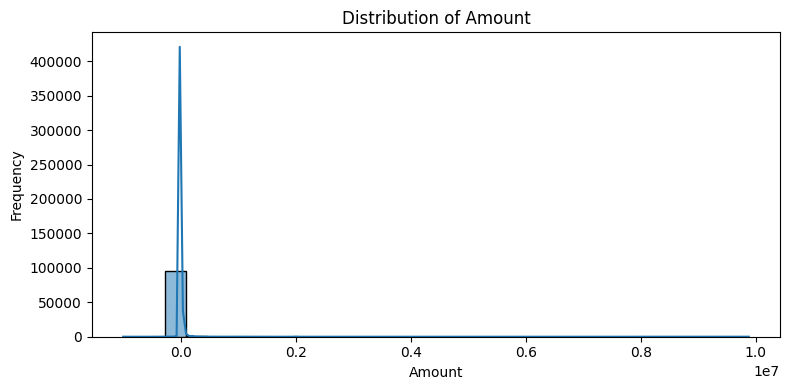

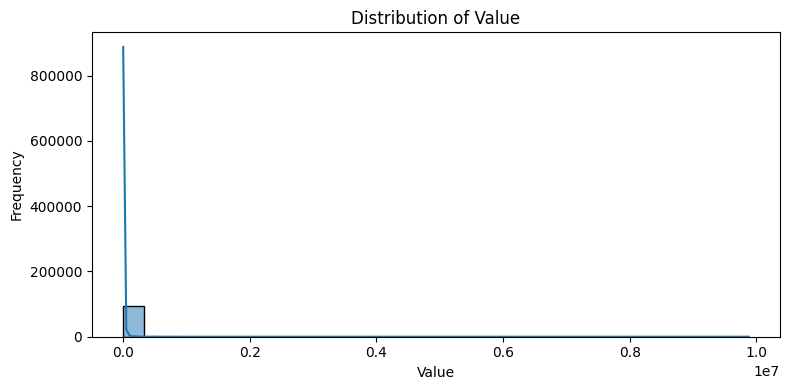

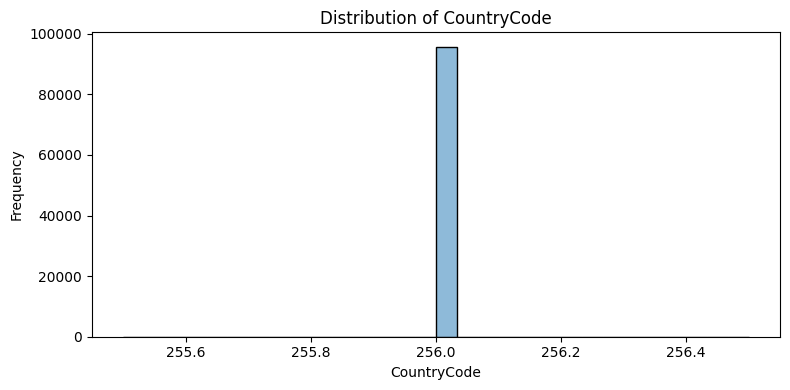

In [31]:
# distibution df["Amount"] over df["Value"]

numerical_cols = ["Amount", "Value", "CountryCode"]
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

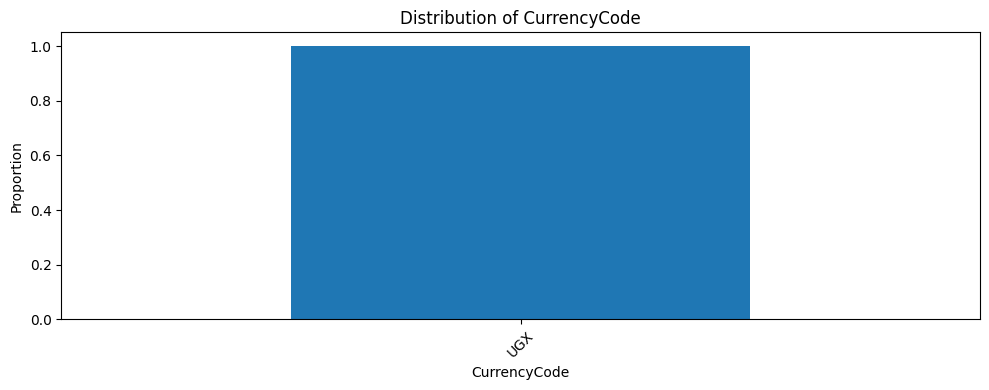

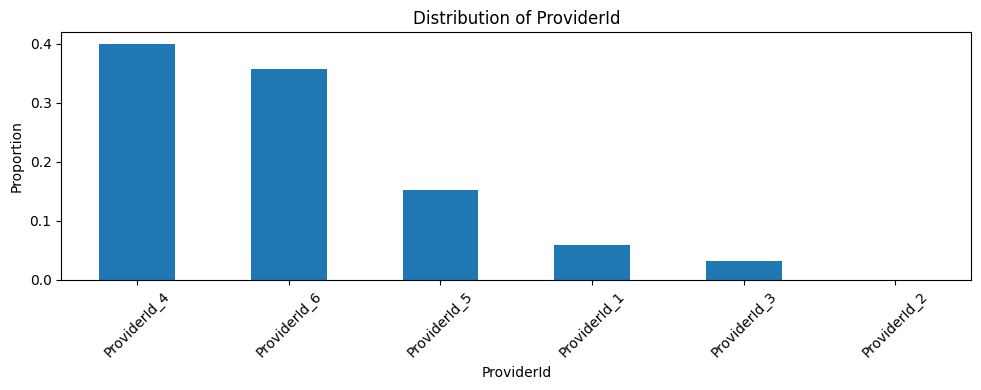

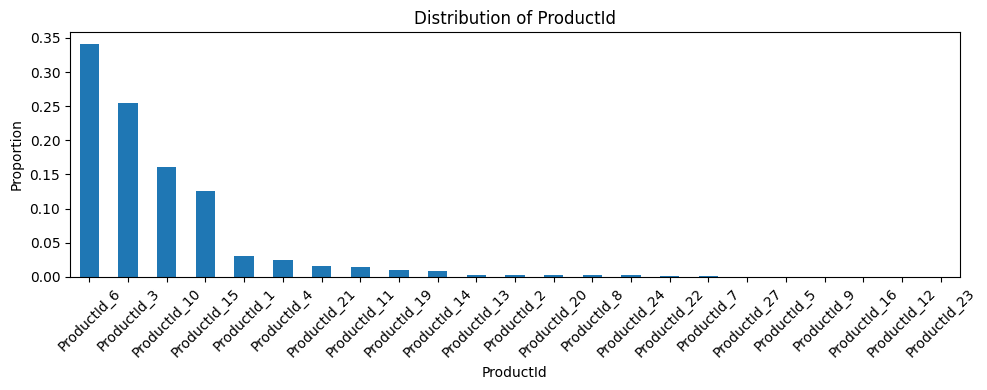

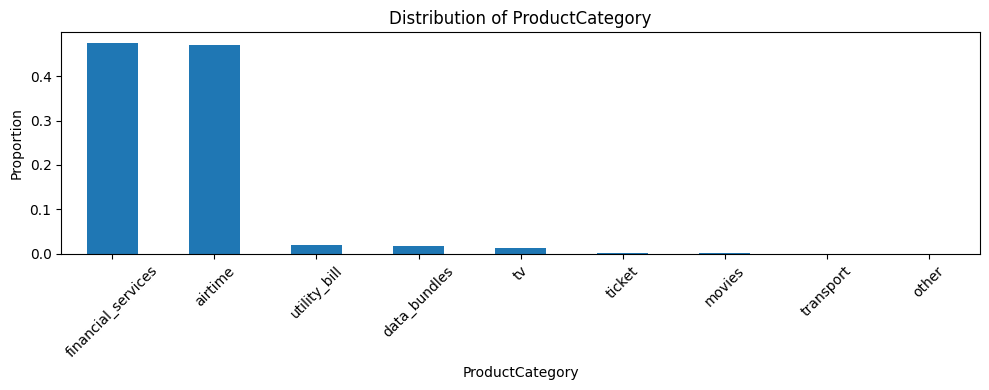

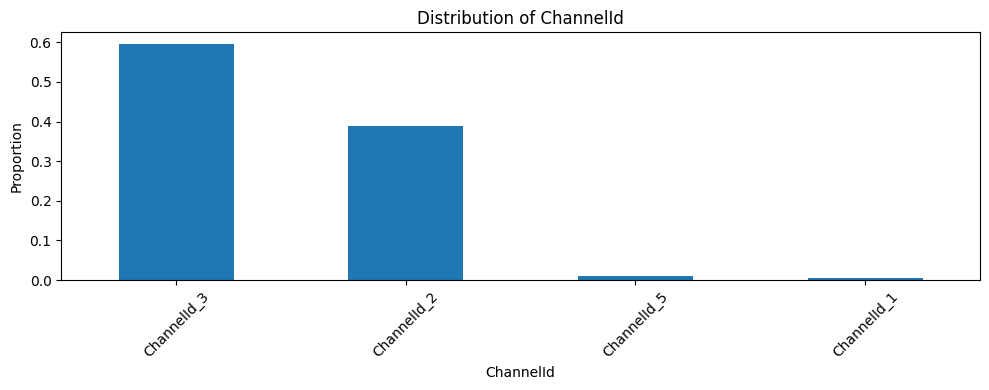

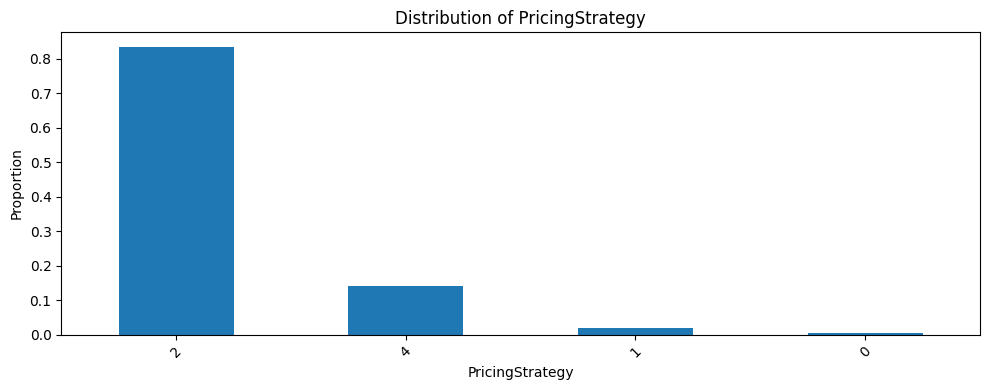

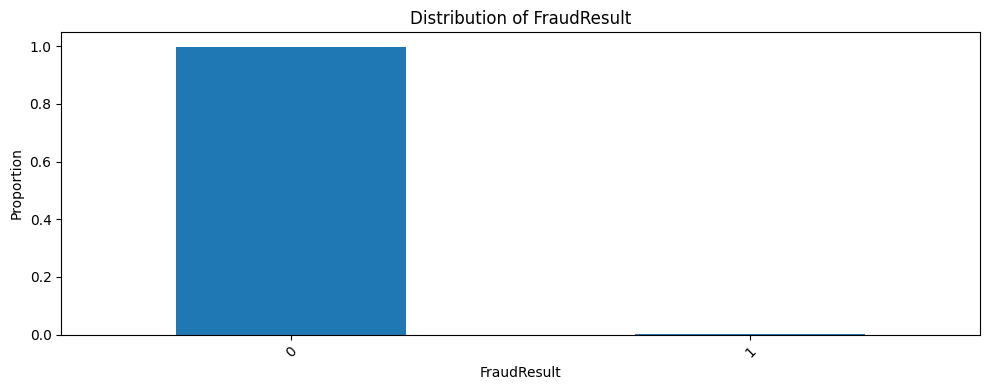

In [24]:
cat_cols = ['CurrencyCode', 'ProviderId', 'ProductId', 
            'ProductCategory', 'ChannelId', 'PricingStrategy', 'FraudResult']

for col in cat_cols:
    plt.figure(figsize=(10, 4))
    df[col].value_counts(normalize=True).plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.ylabel('Proportion')
    plt.xlabel(col)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [26]:
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)

if not missing.empty:
    plt.figure(figsize=(10, 4))
    missing.plot(kind='bar')
    plt.title('Missing Values by Feature')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("✅ No missing values found.")


✅ No missing values found.


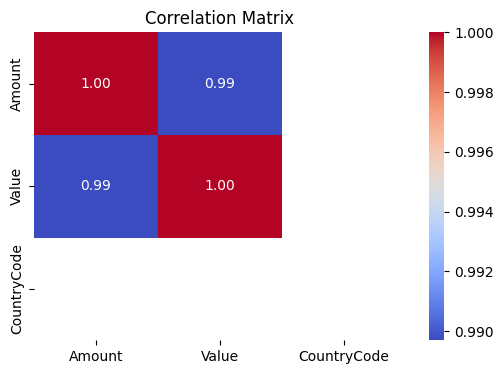

In [32]:
#  Correlation Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

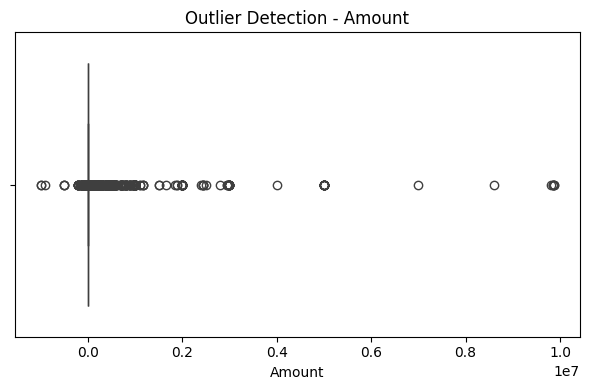

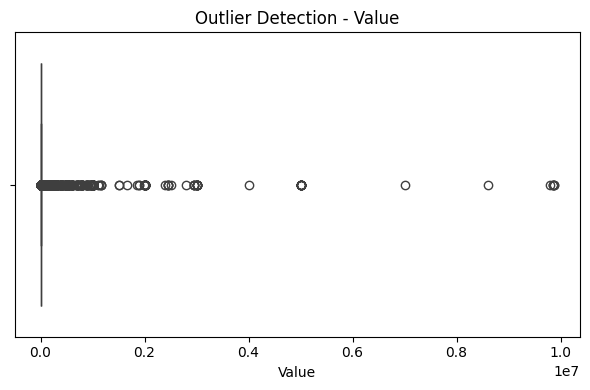

In [28]:
# Boxplots help detect extreme values especially for Amount and Value

for col in ['Amount', 'Value']:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Outlier Detection - {col}')
    plt.tight_layout()
    plt.show()


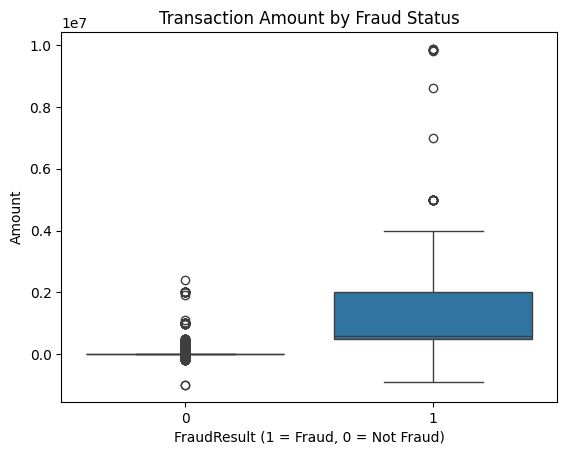

In [34]:
# Fraud Insight — Amount by FraudResult
plt.figure()
sns.boxplot(x='FraudResult', y='Amount', data=df)
plt.title('Transaction Amount by Fraud Status')
plt.xlabel('FraudResult (1 = Fraud, 0 = Not Fraud)')
plt.ylabel('Amount')
plt.show()

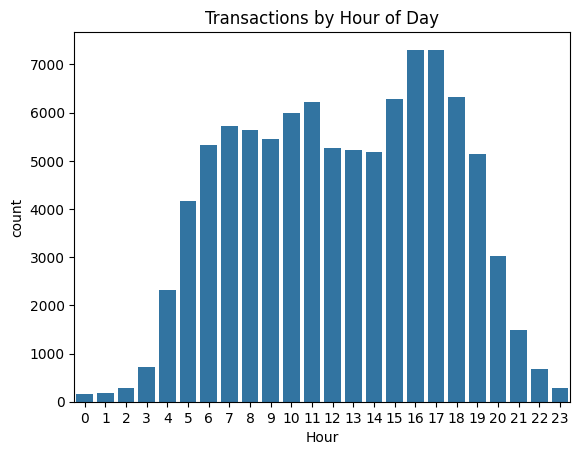

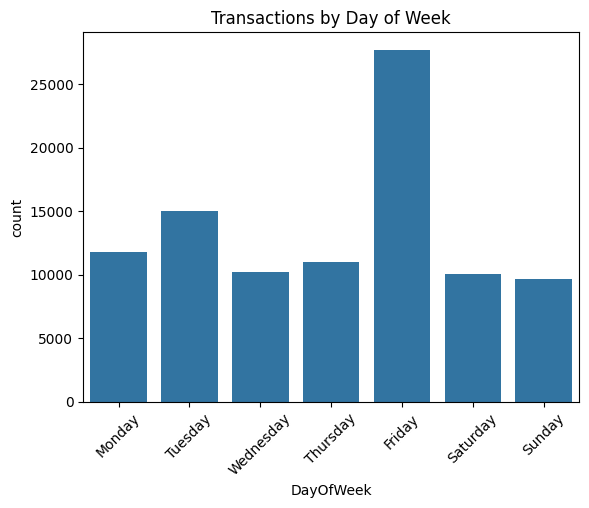

In [37]:
# Time-Based Analysis
df['TransactionStartTime'] = pd.to_datetime(df['TransactionStartTime'], errors='coerce')

df['Hour'] = df['TransactionStartTime'].dt.hour
df['DayOfWeek'] = df['TransactionStartTime'].dt.day_name()

plt.figure()
sns.countplot(x='Hour', data=df)
plt.title('Transactions by Hour of Day')
plt.show()

plt.figure()
sns.countplot(x='DayOfWeek', data=df, order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title('Transactions by Day of Week')
plt.xticks(rotation=45)
plt.show()
